In [401]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [465]:
# 1) importation des données et visualisation des 10 premières colonnes
data = pd.read_csv('train.xls')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [466]:
# 2) affichage des informations des variables et le nombre de valeurs non nulles

data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [467]:
data.describe()
data=data.drop('PassengerId', axis = 1)

In [468]:
#missing values 

bilan_missing_values = data.isnull().sum().sort_values(ascending = False)

In [469]:
bilan_missing_values

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
dtype: int64

In [470]:
# 1) Filtrage et construction des données du modèle 0

def parse_model_0(X):
    target = X.Survived
    X=X[['Fare', 'SibSp', 'Parch']]
    return X , target

data_0 , y = parse_model_0(data.copy())

In [471]:
data_0

,Fare,SibSp,Parch
0,7.2500,1,0
1,71.2833,1,0
2,7.9250,0,0
3,53.1000,1,0
4,8.0500,0,0
...,...,...,...
886,13.0000,0,0
887,30.0000,0,0
888,23.4500,1,2
889,30.0000,0,0


2 ) nous utilisons une strategie de validation croisée pour éviter le surapprentissage du fait que notre jeu de donnée et petit , de plus , plus l' ensemble de validation est important plus l'estimation de la performance de validation du modèle sera robuste

In [472]:
from sklearn.model_selection import cross_val_score

In [473]:
def compute_score(clf, X, y):
    xval = cross_val_score(clf, X, y, cv=5)
    return np.mean(xval)

In [474]:
from sklearn.linear_model import LogisticRegression

In [475]:
model_1 = LogisticRegression(max_iter=200).fit(data_0, y)

In [476]:
# 3) le score 

score = compute_score(model_1, data_0, y)
print(' le score du model 1 est {}'.format(score))

 le score du model 1 est 0.6746092524009792


In [477]:
# 1) division de la population en deux
survived = data[data.Survived==1]
dead = data[data.Survived==0]

In [478]:
# l' histogramme 

def plot_hist(feature, bins = 5):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label = ['Victime','Survivant'], bins = bins)
    plt.legend(loc= 'upper left')
    plt.title('distrution relatie de %s' %feature)
    plt.show()

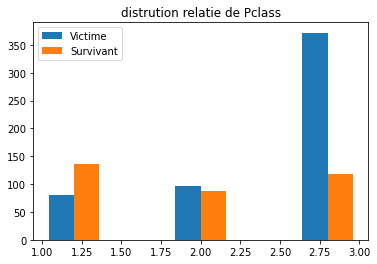

In [479]:
plot_hist('Pclass')

3 ) la variable Pclass est importante car on constate qu' il ya une relation entre la classe et les deux variables victime et survivant. il y ' a plus de victime dans la classe de 3 et plus de survivant dans la classe 1, donc la variable Pclass est fortement liée à nos deux variables.

In [480]:
# 4) 

def parse_model_1(X):
    target = X.Survived
    class_dummies = pd.get_dummies(X['Pclass'],prefix='split_Pclass')
    X =X.join(class_dummies)
    to_del = ['Name', 'Age', 'Cabin','Embarked', 'Survived', 'Ticket', 'Sex', 'Pclass']
    for col in to_del:
        del X[col]
    return X, target

In [481]:
data_1, Y = parse_model_1(data.copy())
data_1

,SibSp,Parch,Fare,split_Pclass_1,split_Pclass_2,split_Pclass_3
0,1,0,7.2500,0,0,1
1,1,0,71.2833,1,0,0
2,0,0,7.9250,0,0,1
3,1,0,53.1000,1,0,0
4,0,0,8.0500,0,0,1
...,...,...,...,...,...,...
886,0,0,13.0000,0,1,0
887,0,0,30.0000,1,0,0
888,1,2,23.4500,0,0,1
889,0,0,30.0000,1,0,0


In [482]:
model_2 = LogisticRegression(max_iter=200).fit(data_1, Y)

In [483]:
# 5) 

score = compute_score(model_2, data_1, Y)
print(' le score du model 1 est {}'.format(score))

 le score du model 1 est 0.6937040989266211


On Constate une amélioration du score, donc le modèle 2 est meilleure que le modèle 1

In [484]:
# 6) Poids des variables 

def plot_lr_coefs(X, lr):
    fig , ax = plt.subplots()
    xlabels = X.columns.values.tolist()
    yvalues = lr.coef_[0,]
    index = np.arange(len(yvalues))
    bar_width = 0.35
    opacity = 0.4
    rects = plt.bar(index, yvalues, bar_width, alpha= opacity, color='b', label='')
    plt.ylabel('Valuer')
    plt.title('Poids des variables')
    plt.xticks(index, xlabels, rotation = 40)
    plt.legend()
    plt.tight_layout()
    plt.show()

No handles with labels found to put in legend.


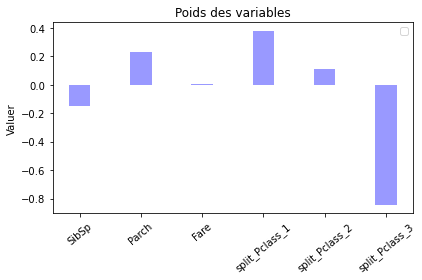

In [485]:


plot_lr_coefs(data_1, model_2 )

Commentaire = on constate que les variables split_Pclass1 et split_Pclass_3 ont des poids importants dans le modèle, la variable Fare semble n' avoir aucune influence dans le modèle

In [486]:
# 1) Nouveau jeu de données 

def parse_model_3(X):
    target = X.Survived
    class_dummies_1 = pd.get_dummies(X['Pclass'],prefix='split_Pclass')
    class_dummies_2 = pd.get_dummies(X['Sex'],prefix='split_Sex')
    X =X.join(class_dummies_1)
    X =X.join(class_dummies_2)
    to_del = ['Name','Cabin','Embarked', 'Survived', 'Ticket', 'Sex', 'Pclass']
    for col in to_del:
        del X[col]
    return X, target

In [487]:
data_2 , target = parse_model_3(data.copy())

In [488]:
data_2

,Age,SibSp,Parch,Fare,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male
0,22.0,1,0,7.2500,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,1,0
3,35.0,1,0,53.1000,1,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,1,0,0,1
887,19.0,0,0,30.0000,1,0,0,1,0
888,NaN,1,2,23.4500,0,0,1,1,0
889,26.0,0,0,30.0000,1,0,0,0,1


In [489]:
data_2['Age']=data_2.Age.fillna(data_2.Age.median())

In [490]:
# 2) Caalculer la regression 
model_3 = LogisticRegression(max_iter=500)


In [491]:
model_3.fit(data_2, target)

LogisticRegression(max_iter=500)

In [492]:
score = compute_score(model_3, data_2, target)

In [493]:
score

0.7867553825874083

Commentaire : on constate une amélioration du score par rapport au modèle 2 , due à l' ajout de la variable Sex, on peut donc dire qu' elle est importante dans l' analyse du modèle.

No handles with labels found to put in legend.


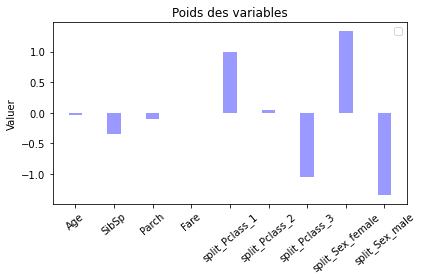

In [494]:
# 3) Poids des variables

plot_lr_coefs(data_2, model_3)

Commentaire : La variable sex est importante mais la variable Age semble ne pas avoir une grande influence dans le modèle

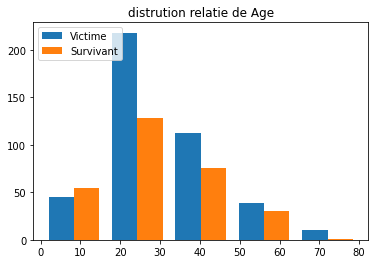

In [495]:
# 4) Histogrammes des survivants et des victimes pour la variable Age

plot_hist('Age')

Commentaire : On constate qu' il ya eu plus de victime dans les tranches d'age de 18 à 23 ans, beaucoup plus de survivants que de victimes chez les moins de 12 ans et presque pas de survivant ches les plus de 70 ans 

In [496]:
# 5) la variable is_child
data_2['is_child']= data_2.Age <8
#conversion du boolean en binaire
data_2['is_child']= data_2['is_child'].astype(int)
data_2

,Age,SibSp,Parch,Fare,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,is_child
0,22.0,1,0,7.2500,0,0,1,0,1,0
1,38.0,1,0,71.2833,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0
3,35.0,1,0,53.1000,1,0,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,1,0,0,1,0
887,19.0,0,0,30.0000,1,0,0,1,0,0
888,28.0,1,2,23.4500,0,0,1,1,0,0
889,26.0,0,0,30.0000,1,0,0,0,1,0


In [497]:
model_3 = LogisticRegression(max_iter=500)
model_3.fit(data_2, target)

LogisticRegression(max_iter=500)

In [498]:
score_model_3 = compute_score(model_3, data_2, target)
score_model_3

0.7990961019396147

Commentaire : on constate une petite amélioration du score avec l' ajout de la variable is_child, donc la variable age à une certaine influence dans le modèle 

No handles with labels found to put in legend.


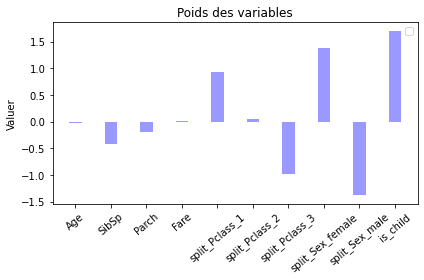

In [499]:
plot_lr_coefs(data_2, model_3)

Commentaire : comme demontré par le score, la variable is_child à une grande importance dans le modèle

In [500]:
# Suppression de la variable is child et construction du jeu de donnée pour random forest
data_5 = data_2.drop('is_child', axis=1)

In [501]:
data_5

,Age,SibSp,Parch,Fare,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male
0,22.0,1,0,7.2500,0,0,1,0,1
1,38.0,1,0,71.2833,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,1,1,0
3,35.0,1,0,53.1000,1,0,0,1,0
4,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,1,0,0,1
887,19.0,0,0,30.0000,1,0,0,1,0
888,28.0,1,2,23.4500,0,0,1,1,0
889,26.0,0,0,30.0000,1,0,0,0,1


In [502]:
from sklearn.ensemble import RandomForestClassifier

In [503]:
model_4 = RandomForestClassifier()

In [504]:
model_4.fit(data_5, target)

RandomForestClassifier()

In [505]:
score_model_4= compute_score(model_4, data_5, target)

In [506]:
score_model_4

0.8070177641077144

In [507]:
# 3)
from past.builtins import xrange
def clf_importance(X, clf):
    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.title("Feature importances")
    for tree in clf.estimators_:
        plt.plot(xrange(X.shape[1]), tree.feature_importances_[indices], "r")
    plt.plot(xrange(X.shape[1]), importances[indices], "b")
    plt.show();
    for f in range(X.shape[1]):
        print("%d. feature : %s (%f)" % (f + 1,
        X.columns[indices[f]],
        importances[indices[f]]))

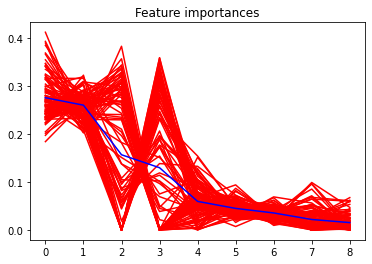

1. feature : Fare (0.275981)
2. feature : Age (0.260376)
3. feature : split_Sex_male (0.156900)
4. feature : split_Sex_female (0.129804)
5. feature : split_Pclass_3 (0.059548)
6. feature : SibSp (0.044916)
7. feature : Parch (0.035409)
8. feature : split_Pclass_1 (0.021786)
9. feature : split_Pclass_2 (0.015280)


In [508]:
clf_importance(data_5, model_4)

Commentaire : ON constate que la variable Fare à plus de poids , suivi de la variable Age alors que ce n' était pas le cas dans les modèles de regression logistique.